## Project 4: Image clustering

We have seen in recursion how problems can be solved elegantly by using self-similarity. 

For images, many images may look like the same based on the color, angle, content, etc.

Based on this similarity, we can group similar images together.


Image Similarity compares two images and computes how visually similar they are. The images that are similar can be group together. 


## Applications

Duplicate removal. 
finding a visually similar set so that they can be presented together.

If you go to the photo storage app on your phone, you will see in many cases similar images are grouped togetehr under labels like mountains, kids, water, etc.

## How do we group visually similar images without having to go through each of them?

One way to do this is clustering.

### Clustering

Clustering allows us to automatically group images into semantically meaningful clusters when ground-truth annotations are absent.

Semantically meaningful clusters will not only consider the pixel colors but also the subject of the image.

Like this image below.

[Clusters from ImageNet](https://images.app.goo.gl/tdFJdsdT1o7VK1Nq9)





## In this project, we will apply machine learning tecniques to cluster similar images together.

To do this, we will use

* [Keras](https://keras.io/getting_started/intro_to_keras_for_engineers/): a deep leraning library that is easy to use and learn.
* [sklearn]((https://scikit-learn.org/stable/auto_examples/cluster/plot_birch_vs_minibatchkmeans.html#sphx-glr-auto-examples-cluster-plot-birch-vs-minibatchkmeans-py)): machine learning library with many methods for calculating features and building ML models. 
* [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html): Visulization, plotting
* [pandas](https://pandas.pydata.org/docs/user_guide/10min.html): If your data likes table format, this is a good library to maintain and 
* [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html): If you like pixel values in your images as arrays to quickly do computation, numpy will get this done.
* [pickle](https://pythonbasics.org/pickle/): You have some computed results and would like to save them. Use pickle for efficient storage.

in this project. 

You probably want to explore these libraries even after finishing this project. You will use sklearn in CS 251, and numpy in CS 343 at Colby.

We will continue using these libraries for our projects, the final project, and other computing courses at Colby.

Let's get started!

## First, let's install the packages we will use

In [ ]:
# source: https://pypi.org/project/keras/
# source: https://pypi.org/project/tensorflow/
!pip install keras
!pip install tensorflow

## Import libraries

**Note** If you would like to know how each of the methods in each line works, go to the documentation (listed above) and paste the name of the method in the search bar. 


In [ ]:
#for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

## Step 1

Run the following cell. Its output will tell you the current location of this notebook.

In [4]:
!pwd

/workspaces/CS166_Project4


## Step 2
To pass all the images into our clutsering procedure, we need to first get the names of the files in to a list, so that we can pass it to our clutsering method.

In [9]:
#this lets your notebooks find the folder location where the images are located
path = "/workspaces/CS166_Project4/flowers"

# this changes the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

### `flowers` contain the names of all the files we have in our data folder `flower`

## Task 1: write code to sort the list of flowers (2 points)

In [18]:
## write code to sort the list of flowers




['0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '0083.png', '00

## Task 2: write a function `get_data(path)` (5 points)

Here `path` represents where the data is located
the function returns `flowers` represents the list with names of all the image files.

In [13]:
# write get_data

def get_data(path, data_list):











    



## Step 3

Next we will load all the images into the same size. Beacuse we are in Python, converting the pixels of image into arrays make sense (we have s=done this when using OpenCV).

Let's take the first image in the list and load as a 224 x 224 array.

In [19]:
#load the image as a 224x224 array
img = load_img(flowers[0], target_size=(224,224))

# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


This means the image above has 224 x 224 dimension and 3 channels of colors (Red, Green, Blue)

Next, we want to reshape the image to have an extra dimension for index so that we can easily track and store the image. 

In [20]:
# creates a new dimension at the front using which we can track which image it is
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)


(1, 224, 224, 3)


## Step 4

In this lab, we will use a small dataset of flowers that we have loaded earlier. The dataset contain 210 images of flowers. We want to generate cluster of images that are visually similar.

210 images are not adequate to train a machine learning model. Instead, we will use already built models that will process the images for us so that the computer can easily find the visual similarity. 

The already built model expects data in a ceratin format. We will use `preprocess_input()` to get that format.

In [21]:
prepared_data = preprocess_input(reshaped_img)
prepared_data.shape

(1, 224, 224, 3)

## Step 5

Now we load the model. 


In [ ]:
# load model, in this line we are use VGG16, https://keras.io/api/applications/vgg/
model = VGG16()

# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# use the model to process our images, this allows us to make the computer see similarity
features = model.predict(prepared_data, use_multiprocessing=True)

print(features.shape)


We have loaded the images and processed each of them so that they are described by 4096 characteristics.

We will use these characteristics to compute similarity an dcluster them

Putting these altogether, we write a function.



## Task 3: write a function `extract features(image_file, model)` (5 points)

where the features from the input image file is returned by the function.

In [23]:
def extract_features(file, model):
    
    







    

### Now we will go through each file in list of files of flower image, extract the feature using `extract_features()` function and save them in a dictionary. We are also saving the full dictionary in a pickle file as a back up. 

This cell will take some time to run

In [ ]:
data = {}

# we have defined this pickle file so that we can store the extracted features for each image in to this file
p = "/workspaces/CS166_Project4/flower_features.pkl"

# loop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        # we are using flower variable as the key in this dictionary
        feat = extract_features(flower,model)
        data[flower] = feat
    
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

In [25]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape


(210, 1, 4096)

This means we have 210 images, each image is described 4096 features.

In [26]:
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(210, 4096)

we have removed the extra dimension.

**Inside flowers folder we have a file flower_labels.csv**

First column represents filename, second column represents a catergry label, ranging between 0-9.

## Step 6

We will read the labels now, so that we know which file belongs to which class.

In [27]:
# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('flower_labels.csv')


label = df['label'].tolist()
unique_labels = list(set(label))
print(unique_labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


So we have 10 unique categoris in the dataset.

## Step 7: Dimensionality reduction

Beacuse we have so many characteristics (4096), it will slow for the ML model to find the ones that are most useful

Let's help the model in its job by reducing the characteristics.

We will use dimensionality reduction for this, CS 251 will talk about in great details. The one we are using is called [Principal Components Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [28]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)

# x will hold the data described by reduced number of features
x = pca.transform(feat)

In [29]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")


Components before PCA: 4096
Components after PCA: 100


By applying dimenaionality reduction, we have reduced the number of characteristics that needs to be matched for similarity from 4096 to 100.

This will make the process much faster (recall lecture on Hash Table, time complexity).

## Step 8

Next we will apply our clustering method. In this case we are using, [Kmeans-clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).
This is an unsupervised machine elarning method, which means it does not require labels.

In [30]:
# we are initiating a clusteirng model that expect 10 distinct classes
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)

# Then we apply the model on our features, so that can cluster them into categories
kmeans.fit(x)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=22)

## Step 9

The clustering step transforms the data (x) so that it can be clustered into $n$=10 categories.

let's declare a dictionary to store each distinct cluster separately.

In [31]:

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [32]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));

    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
        

### Task 4: write a loop that will pass each cluster iD to the function above and the images in that cluster will be displayed. (5 points)

In [ ]:
## Your code goes here











In [ ]:
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

It is hard to select an optimal $k$ clusters. Instead, we use plots like the one above to find optimal $k$. Notice how around $k$ = 10, the graph shifts a bit.

## View the clusters

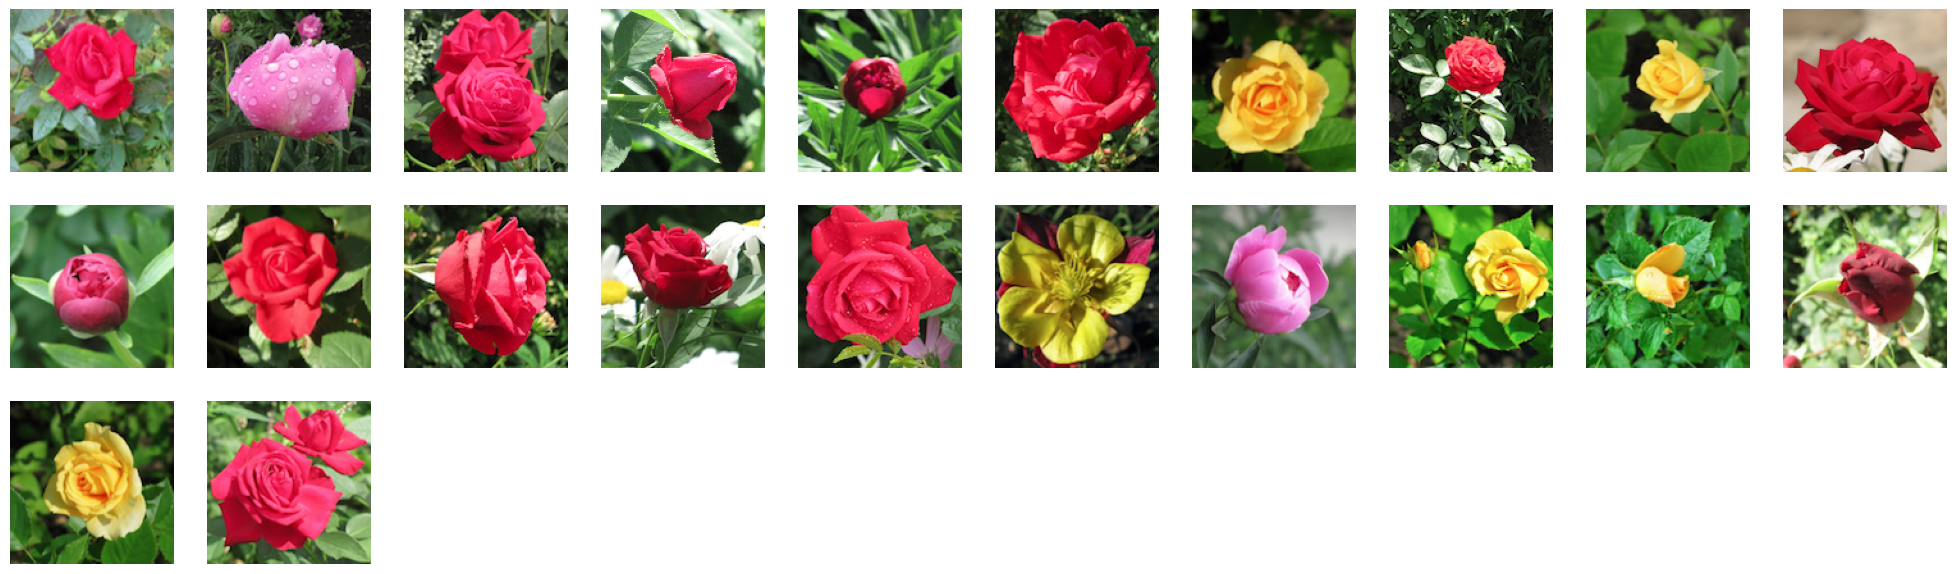

In [30]:
view_cluster(9)

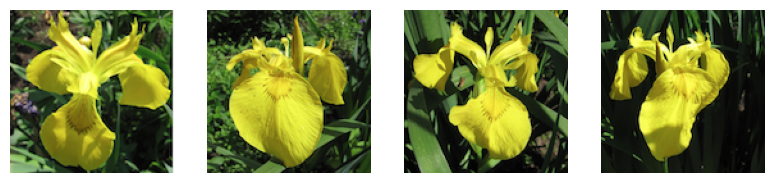

In [33]:
view_cluster(7)

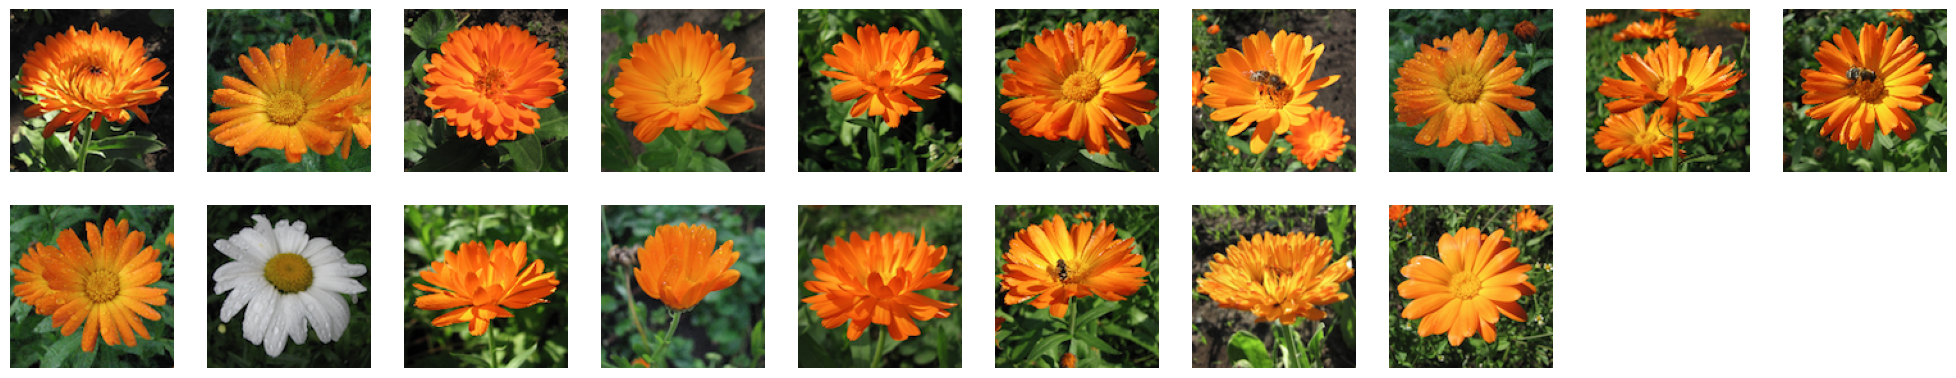

In [34]:
view_cluster(2)

## Question 

1.  Can you identify what characteristic is being used in each of the clusters (e.g. color, image attributes, etc.) Can you see any difference between the two clustering method? (3 points)

Your answer:




2. Can you find some examples of images that are being clustered with a wrong cluster. Why this is happeing? State your assumptions.(3 points)



Your answer:

## Extensions

Congratulations on completing the core tasks! If you have generated answered the tasks 1-6 you've earned 23/30 points.

The remaining 7/30 are a chance for you to earn credit for exploring parts of resources mentioned in this project and digging deeper to express your creativity! This is entirely optional; 26/30 is a B and is a perfectly respectable place to stop. Extensions are open-ended and exist to compliment the structured core project. Explore and learn something new that interests you! Concentrating your energy on 1-2 "deep" extensions that challenge you will earn you more points than many small, "shallow" extensions.

You can pick you own topics that interest you. Here are a few examples:

* Try putting te entire clustering pipeline into a single function, that will take a path of files, number of clusters, and a model like VGG16, and then view the clusters. Are they different from previous clustering result?

* Try clustering on the full set of features (4096 items) by skipping dimensionality reduction.

* Can you apply this pipeline to cluster other datasets? Kaggle have some very nice datasets for this problem. Want to try?

Below are some more structured ones.

### Extension Task 5 : Different set of features (4points)

In `import package` section we have imported VGG16.

Let's do the clustering with another pre-built model.


[From this list](https://keras.io/keras_core/api/applications/) pick at least one other  pre-built model to extract features and they apply k-means clustering to understand why it works and why it does not.

Follow the code above to create a second set of image picture.

In [33]:

# pick a prebuilt model other than VGG16, such as InceptionV3 etc,
# run the steps above to find how it worked and display the clusters you have go












### Extension Task 6 : Different clustering methods (3points)
Can you apply a different clustering method, apart form K-means?


[From this list](https://scikit-learn.org/stable/modules/clustering.html) pick at least a new model to extract similarity and they apply k-means clustering to understand why it works and why it does not.

Follow the code above to create a second set of clusters. Display them.

In [ ]:

# your code goes here









## Checklist
Before you submit:

Make sure to edit the readme file to add your name.

Make sure you have answered each questions. You can find input files in the project directory.

You have added your code and the output image is displayed in the notebook. Submit your code to Github Classroom assignment link.

You are welcome to use other images from your collection. Have fun!